# Paso 1. Acceda los datos y prepáralos para el análisis

Almacena los datos de visitas, pedidos y gastos en variables.  Optimiza los datos para el análisis. Asegúrate de que cada columna contenga el tipo de datos correcto. 
Rutas de archivos: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

In [3]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
visits['End Ts'] = pd.to_datetime(visits['End Ts'], format='%Y-%m-%d %H:%M:%S')
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits.columns = ['device', 'session_end_ts', 'source_id', 'session_starts_ts', 'uid']

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   device             359400 non-null  object        
 1   session_end_ts     359400 non-null  datetime64[ns]
 2   source_id          359400 non-null  int64         
 3   session_starts_ts  359400 non-null  datetime64[ns]
 4   uid                359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [7]:

visits.head()

,device,session_end_ts,source_id,session_starts_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [9]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
orders.columns = ['buy_ts', 'revenue', 'uid']

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [11]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [12]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [13]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [14]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [15]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


## Visitas:

### 1.-¿Cuántas personas lo usan cada día, semana y mes? 

In [16]:
visits['session_month']= visits['session_starts_ts'].dt.to_period('M').dt.start_time
visits['session_week']= visits['session_starts_ts'].dt.isocalendar().week
visits['session_date'] = visits['session_starts_ts'].dt.date

In [17]:
visits.head()

,device,session_end_ts,source_id,session_starts_ts,uid,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,52,2017-12-27


In [18]:
dau = visits.groupby('session_date').agg({'uid':'nunique'})
wau = visits.groupby('session_week').agg({'uid':'nunique'})
mau = visits.groupby('session_month').agg({'uid':'nunique'})

print('DAU',int(dau.mean()),'visitantes')
print('WAU',int(wau.mean()),'visitantes')
print('MAU',int(mau.mean()),'visitantes')

DAU 907 visitantes
WAU 5825 visitantes
MAU 23228 visitantes


#### Los numeros se mantienen relativamente estables en día, semana y mes.

### 2.-¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

In [19]:
session_per_user = visits.groupby('session_date').agg({'uid':['count','nunique']})
session_per_user.columns= ['n_sessions', 'n_users']
session_per_user['ses_per_user'] = session_per_user['n_sessions'] / session_per_user['n_users']
session_per_user.head()

,n_sessions,n_users,ses_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


#### El numero de sesiones ya reales si varia algo, veo días de 477 y otro de casi 900, seguro paara tener un promedio de 900 debe haber días con muchas mas sesiones, entonces si esta disparado los extremos, a ver si averiguamos por que.

### 3.-¿Cuál es la duración de cada sesión?

In [20]:
visits['duration'] = (visits['session_end_ts'] - visits['session_starts_ts']).dt.seconds
visits.head()

,device,session_end_ts,source_id,session_starts_ts,uid,session_month,session_week,session_date,duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,52,2017-12-27,0


#### Lo que llama la atención es que haya sesiones de 0, sera que hay algo en la interfaz que los ahuyenta inmediatamente? 

### 4.-¿Con qué frecuencia los usuarios regresan?

In [21]:
first_visit =  visits.groupby('uid').agg({'session_starts_ts':'min'}).reset_index()
first_visit.columns = ['uid', 'first_session']
first_visit.head()

,uid,first_session
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [22]:
first_visit['first_session_dt'] = first_visit['first_session'].dt.date
first_visit['first_session_month'] = first_visit['first_session'].dt.to_period('M').dt.start_time
first_visit.head()

,uid,first_session,first_session_dt,first_session_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-01


In [23]:
visits_complete = visits.merge(first_visit, on= 'uid')
visits_complete.head()

,device,session_end_ts,source_id,session_starts_ts,uid,session_month,session_week,session_date,duration,first_session,first_session_dt,first_session_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-20,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-19,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-09,2018-03-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-01,10,2018-03-09,1680,2018-03-09 20:05:00,2018-03-09,2018-03-01


In [24]:
visits_complete['life_circle'] = visits_complete['session_month'].dt.month - visits_complete['first_session_month'].dt.month
visits_complete['life_circle'] += 12* (visits_complete['session_month'].dt.year - visits_complete['first_session_month'].dt.year)
visits_complete.head()

,device,session_end_ts,source_id,session_starts_ts,uid,session_month,session_week,session_date,duration,first_session,first_session_dt,first_session_month,life_circle
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-20,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-19,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-09,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-01,10,2018-03-09,1680,2018-03-09 20:05:00,2018-03-09,2018-03-01,0


In [25]:
visits_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359400 entries, 0 to 359399
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   device               359400 non-null  object        
 1   session_end_ts       359400 non-null  datetime64[ns]
 2   source_id            359400 non-null  int64         
 3   session_starts_ts    359400 non-null  datetime64[ns]
 4   uid                  359400 non-null  uint64        
 5   session_month        359400 non-null  datetime64[ns]
 6   session_week         359400 non-null  UInt32        
 7   session_date         359400 non-null  object        
 8   duration             359400 non-null  int64         
 9   first_session        359400 non-null  datetime64[ns]
 10  first_session_dt     359400 non-null  object        
 11  first_session_month  359400 non-null  datetime64[ns]
 12  life_circle          359400 non-null  int64         
dtypes: UInt32(1), 

In [26]:
cohort= visits_complete.pivot_table(
    index= 'first_session_month',
    columns= 'life_circle',
    values= 'uid',
    aggfunc= 'nunique'
)
cohort.fillna('')
cohort_percent = cohort.div(cohort.iloc[:, 0], axis=0)
cohort_percent.index = cohort_percent.index.strftime('%Y-%m')

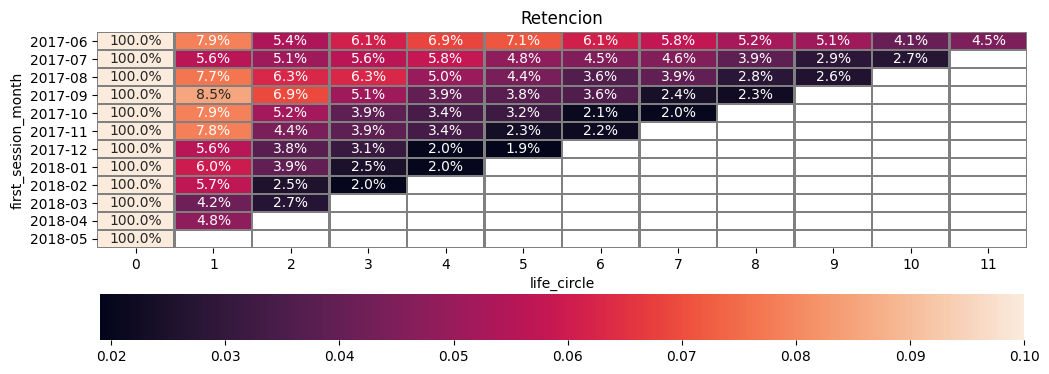

In [27]:
plt.figure(figsize=(12,4))

sns.heatmap(cohort_percent, annot= True, linewidths=1, fmt='.1%' ,linecolor='grey', vmax=0.1, cbar_kws= {'orientation' : 'horizontal'}).set(title= 'Retencion')

plt.show()

#### Tenemos un porcentaje de retención sumamente bajo, pareciera que la gente solo regresa si es necesario no por que les guste, ya que no tenemos ni un 10%

## Ventas

### 1.-¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)

In [28]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [29]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [30]:
orders['buy_dt'] = orders['buy_ts'].dt.date
orders['buy_month'] = orders['buy_ts'].dt.to_period('M').dt.start_time

first_orders = orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
first_orders['first_buy_dt'] = first_orders['buy_ts'].dt.date
first_orders['first_buy_month'] = first_orders['buy_ts'].dt.to_period('M').dt.start_time
first_orders.rename(columns= {'buy_ts':'first_buy_ts'}, inplace= True)
first_orders.head()

,uid,first_buy_ts,first_buy_dt,first_buy_month
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-01
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01


In [31]:
buyers = first_visit.merge(first_orders, on='uid')
buyers.head()

,uid,first_session,first_session_dt,first_session_month,first_buy_ts,first_buy_dt,first_buy_month
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01


In [32]:
buyers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 0 to 36522
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   uid                  36523 non-null  uint64        
 1   first_session        36523 non-null  datetime64[ns]
 2   first_session_dt     36523 non-null  object        
 3   first_session_month  36523 non-null  datetime64[ns]
 4   first_buy_ts         36523 non-null  datetime64[ns]
 5   first_buy_dt         36523 non-null  object        
 6   first_buy_month      36523 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(2), uint64(1)
memory usage: 2.2+ MB


In [33]:
buyers['first_session_dt'] = pd.to_datetime(buyers['first_session_dt'])
buyers['first_buy_dt'] = pd.to_datetime(buyers['first_buy_dt']) 
buyers.head()

,uid,first_session,first_session_dt,first_session_month,first_buy_ts,first_buy_dt,first_buy_month
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01


In [34]:
buyers['days_first_purchase'] = ((buyers['first_buy_ts'] - buyers['first_session'])/np.timedelta64(1,'D')).astype('int')

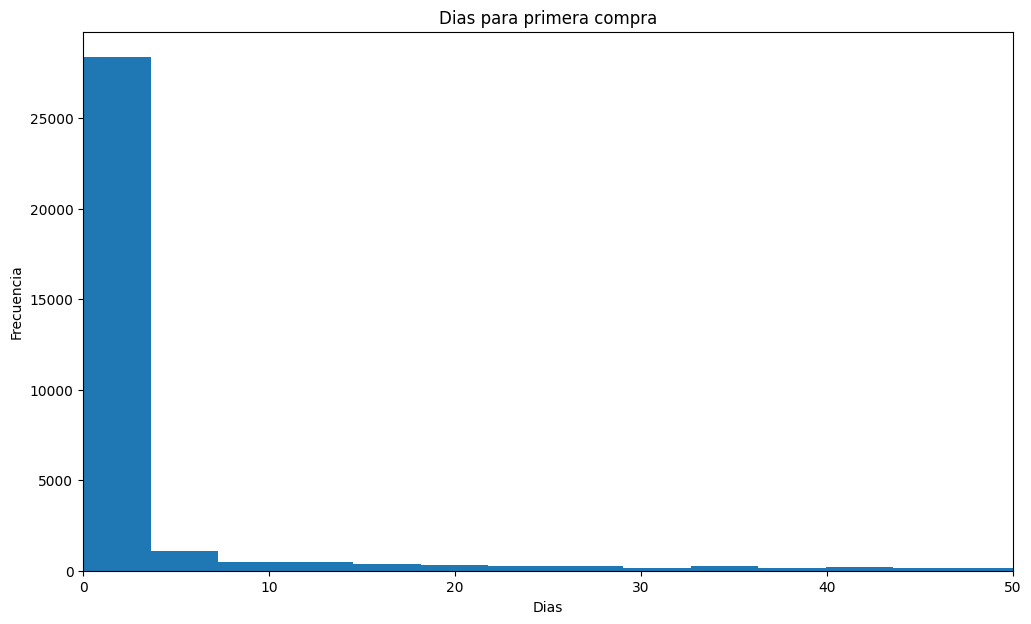

In [35]:
buyers['days_first_purchase'].plot(kind='hist', bins=100, figsize=(12,7)).set(title= 'Dias para primera compra', xlabel= 'Dias', ylabel='Frecuencia' )
plt.xlim(0,50)
plt.show()

#### La gente empieza a comprar aprox en los primero 5 días a partir que ya entraron a la aplicación, creo que esto va muy ligado a la naturaleza del producto, por que esperarian tanto para comprar eventos ya que se pueden agotar.

### 2-¿Cuántos pedidos hacen durante un período de tiempo dado?

In [36]:
how_many_buyers = buyers.pivot_table(
    index= 'first_buy_month',
    values= 'uid',
    aggfunc= 'count'
)
how_many_buyers

,uid
first_buy_month,
2017-06-01,2023
2017-07-01,1923
2017-08-01,1370
2017-09-01,2581
2017-10-01,4340
2017-11-01,4081
2017-12-01,4383
2018-01-01,3373
2018-02-01,3651


#### Aqui es evidente que la temporada alta es Octubre, Noviembre y Diciembre.

### 3.-¿Cuál es el tamaño promedio de compra?

In [37]:
cohort_buyers = orders.merge(buyers, on= 'uid')
cohort_buyers['buy_dt'] = pd.to_datetime(cohort_buyers['buy_dt'])
cohort_buyers.head()

,buy_ts,revenue,uid,buy_dt,buy_month,first_session,first_session_dt,first_session_month,first_buy_ts,first_buy_dt,first_buy_month,days_first_purchase
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01 00:09:00,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01 00:14:00,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01 00:14:00,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01 07:31:00,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01,2017-06-01,0


In [38]:
print("El Valor promedio de compra es:",round(cohort_buyers['revenue'].mean(),2))

El Valor promedio de compra es: 5.0


#### El valor promedio no es muy alto, 5 (suponemos USD), no debe haber una disparidad de extremos tan grande ya que del promedio a 0 no falta mucho.

### 4.-¿Cuánto dinero traen? (LTV)

In [39]:
ltv = cohort_buyers.groupby('uid')['revenue'].sum()
ltv = ltv.reset_index().rename(columns={'revenue': 'ltv'})
ltv.head()

,uid,ltv
0,313578113262317,0.55
1,1575281904278712,3.05
2,2429014661409475,73.33
3,2464366381792757,2.44
4,2551852515556206,10.99


In [40]:
average_ltv = ltv['ltv'].mean()
print(f"LTV promedio por usuario: {average_ltv:.2f}")

LTV promedio por usuario: 6.90


#### El LTV promedio es muy pequeño pero parece que hay valores sumamente pequeños y unos cuantos mas altos (veo uno de 0.55 y otro de 73.33), parece que no es tan estable el numero.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien realizados los cálculos y las gráficas mostradas, queda muy claro el proceso de análisis seguido ya que cada gráfica y resultado mostrado tiene su respectiva interpretación lo cual es una muy buena práctica en análisis complejos cómo este
</div>

## Marketing

### 1.-¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 

In [41]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [42]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [43]:
total_costs = costs['costs'].sum()
print('total de costos:',total_costs)

total de costos: 329131.62


In [44]:
costs['dt_month'] = costs['dt'].dt.to_period('M').dt.start_time
costs.head()

,source_id,dt,costs,dt_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [45]:
visits_trim = visits[['uid', 'source_id', 'session_month']]

visits_with_costs = visits_trim.merge(costs[['source_id', 'dt_month', 'costs']],
                                      left_on=['source_id', 'session_month'],
                                      right_on=['source_id', 'dt_month'],
                                      how='left')
cohort_buyers_trim = cohort_buyers[['uid', 'buy_month', 'revenue']]

full_costs = visits_with_costs.merge(cohort_buyers_trim,
                                  on='uid')
full_costs.head()


,uid,source_id,session_month,dt_month,costs,buy_month,revenue
0,16174680259334210214,9,2018-05-01,2018-05-01,8.28,2018-03-01,2.33
1,16174680259334210214,9,2018-05-01,2018-05-01,11.94,2018-03-01,2.33
2,16174680259334210214,9,2018-05-01,2018-05-01,8.89,2018-03-01,2.33
3,16174680259334210214,9,2018-05-01,2018-05-01,10.43,2018-03-01,2.33
4,16174680259334210214,9,2018-05-01,2018-05-01,7.65,2018-03-01,2.33


In [46]:
monthly_costs = costs.groupby('dt_month')['costs'].sum().reset_index()
monthly_costs.head(12)

,dt_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


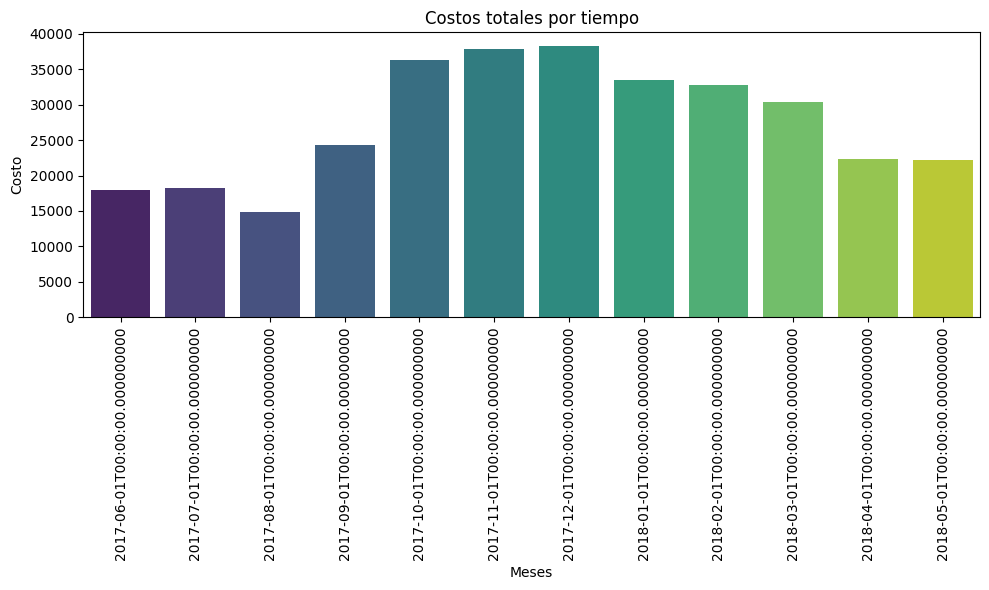

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_costs, x='dt_month', y='costs', palette='viridis')

plt.title('Costos totales por tiempo')
plt.xlabel('Meses')
plt.ylabel('Costo')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [48]:
costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()
costs_by_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


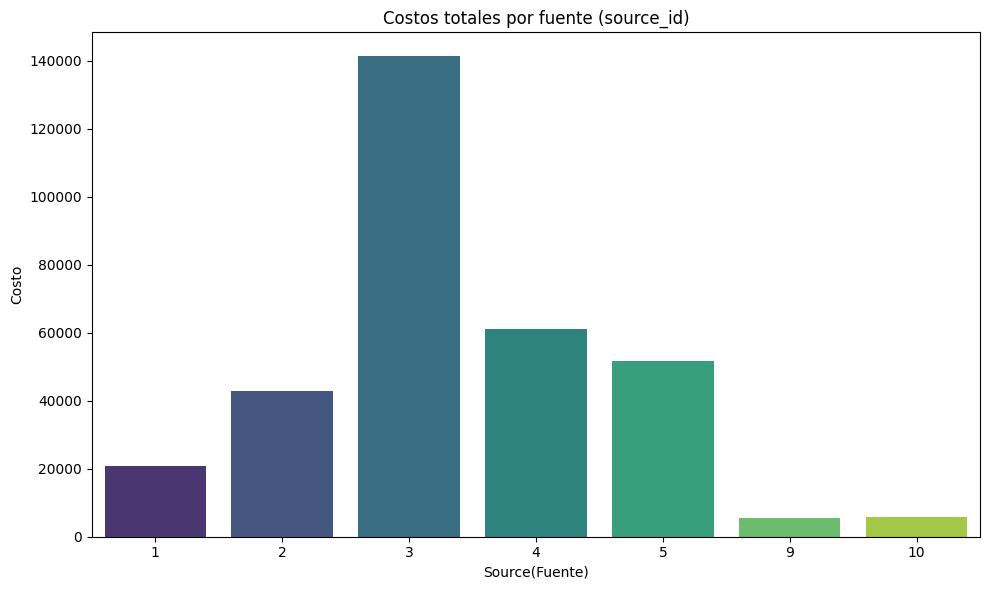

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(data=costs_by_source, x='source_id', y='costs', palette='viridis')

plt.title('Costos totales por fuente (source_id)')
plt.xlabel('Source(Fuente)')
plt.ylabel('Costo')
plt.tight_layout()
plt.show()

#### Los gastos mas fuertes son por los meses donde se obtiene las mayores ventas (Octubre, noviembre y Diciembre), entonces tiene sentido y segun los gastos por la Source de marketing , la número 3 genera muchisimo mas gasto que las demas, y la 9 y 10 muchismo menos que el resto, si el ingreso por ellas se comporta igual podría mantenerse la rentabilidad, sí no tal vez habria que evaluar.

### 2.-Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [50]:
total_customers = cohort_buyers['uid'].nunique()

cac = total_costs / total_customers

print("El CAC general es:",cac)

El CAC general es: 9.011626098622786


In [52]:
full_costs.head()

buyers_per_source = full_costs.groupby('source_id')['uid'].nunique().reset_index()
buyers_per_source = buyers_per_source.rename(columns={'uid': 'num_customers'})
buyers_per_source

,source_id,num_customers
0,1,7138
1,2,7305
2,3,13846
3,4,14253
4,5,10156
5,7,1
6,9,2793
7,10,1773


In [53]:
cac = costs_by_source.merge(buyers_per_source, on='source_id', how='left')
cac['cac'] = cac['costs'] / cac['num_customers']
cac.head(15)

,source_id,costs,num_customers,cac
0,1,20833.27,7138,2.918642
1,2,42806.04,7305,5.859828
2,3,141321.63,13846,10.206676
3,4,61073.60,14253,4.284965
4,5,51757.10,10156,5.096209
5,9,5517.49,2793,1.975471
6,10,5822.49,1773,3.283976


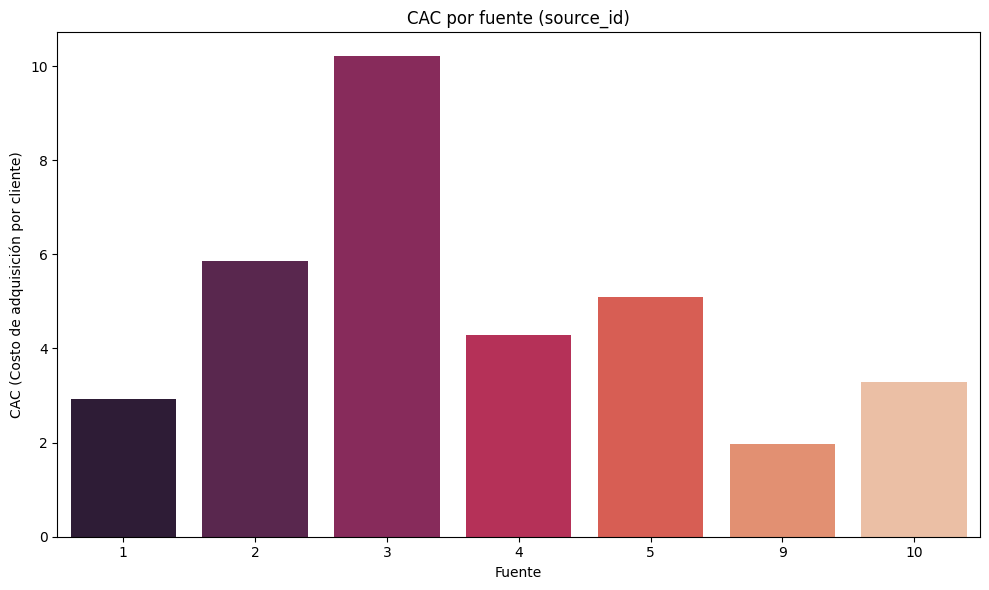

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(data=cac, x='source_id', y='cac', palette='rocket')

plt.title('CAC por fuente (source_id)')
plt.xlabel('Fuente')
plt.ylabel('CAC (Costo de adquisición por cliente)')
plt.tight_layout()
plt.show()

#### El cac se mantiene con el número 3 mas alto, el cual sigue con la logíaca de la pregunta anterior. 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, el cálculo y las gráficas mostradas son las adecuadas para esta parte del análisis. Cómo recomendación aquí es que cada que muestres este tipo de gráficas complementes mejor el análisis redactando la interpretación de las gráficas un poco más detalladas para comunicar mejor el mensaje del análisis
</div>

### 3.-¿Cuán rentables eran las inversiones? (ROMI)

In [58]:
revenue_by_source = full_costs.groupby('source_id')['revenue'].sum().reset_index()
romi = revenue_by_source.merge(costs_by_source, on='source_id', how='left')
romi['romi'] = ((romi['revenue'] / romi['costs']) - 1).round(2)
romi.head()

,source_id,revenue,costs,romi
0,1,6.942583e+07,20833.27,3331.45
1,2,7.958530e+07,42806.04,1858.21
2,3,8.989582e+06,141321.63,62.61
3,4,1.501731e+07,61073.60,244.89
4,5,3.571977e+07,51757.10,689.14


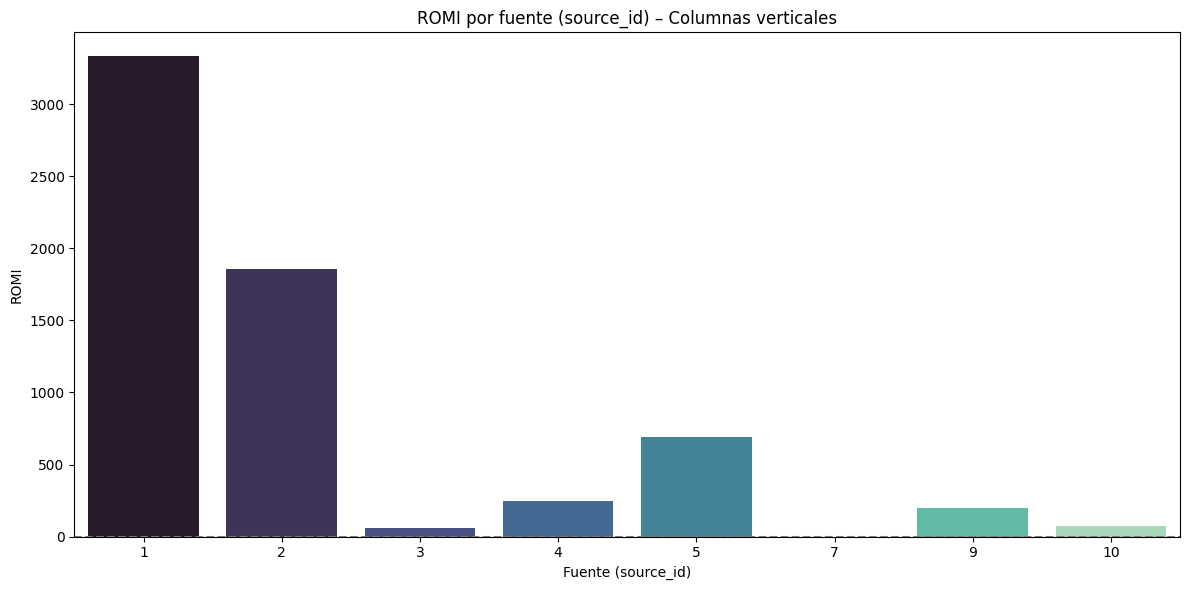

In [60]:
plt.figure(figsize=(12, 6))
sns.barplot(data=romi.sort_values('romi', ascending=False), x='source_id', y='romi', palette='mako')

plt.title('ROMI por fuente (source_id) – Columnas verticales')
plt.xlabel('Fuente (source_id)')
plt.ylabel('ROMI')
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

#### Segun el analisis de renatbilidad el 1 es sumamente mas rentable y el 3 es casi el menos rentable.

# CONCLUSION

## Segun nuestro analisis de ROMI el 1 es la fuente o source mas rentable, si comparamos los costos de esta fuente contra la mas costosa, osea la 3, es casi 3 veces menor, pero en cuestion de rentabilidad es muchisimo mayor la 1. En conclusión yo usaria mas que nada la 1 y la 2 y me desharia de la 3.